In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("Influence of ash.xlsx",sheetname="Sheet1")

In [3]:
data.head(5)

,Date,Month Code,Month,Pretreatment area ON,Througput DRY,Ash,Screw,ScrewVersion,Season
0,2018-01-01,1,January,19.300000,11.606055,6.820000,Screw1,1_v5,Season4
1,2018-01-02,1,January,14.033333,12.144711,6.490000,Screw1,1_v5,Season4
2,2018-01-03,1,January,18.650000,12.639730,6.953333,Screw1,1_v5,Season4
3,2018-01-04,1,January,6.316667,11.325899,6.630000,Screw1,1_v5,Season4
4,2018-01-05,1,January,11.300000,10.662815,6.040000,Screw1,1_v5,Season4


In [4]:
data.describe()

,Month Code,Pretreatment area ON,Througput DRY,Ash
count,834.000000,571.000000,491.000000,470.000000
mean,7.800959,14.162878,11.990308,7.376947
std,2.908150,7.647829,2.781808,2.028565
min,1.000000,0.016667,4.686505,3.200000
25%,6.000000,7.591667,10.243412,5.941250
50%,8.000000,14.650000,11.675273,6.991667
75%,10.000000,21.091667,13.704289,8.555000
max,12.000000,24.000000,20.395199,15.053333


In [5]:
data_clean=data.dropna(axis=0)

In [6]:
data_clean.describe()

,Month Code,Pretreatment area ON,Througput DRY,Ash
count,445.000000,445.000000,445.000000,445.000000
mean,7.806742,16.691845,12.131577,7.321771
std,2.919097,6.051418,2.804687,2.011204
min,1.000000,2.500000,4.686505,3.200000
25%,6.000000,11.783333,10.312249,5.920000
50%,8.000000,18.216667,11.926355,6.960000
75%,10.000000,22.300000,13.884030,8.450000
max,12.000000,24.000000,20.395199,15.053333


In [33]:
data_clean['Biomass']=data_clean['Pretreatment area ON'] * data_clean['Througput DRY']

C:\Users\Torbjorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
month=data_clean['Month']
ash=data_clean["Ash"]
throughput=data_clean["Througput DRY"]
uptime=data_clean['Pretreatment area ON']
biomass=data_clean['Biomass']

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline   

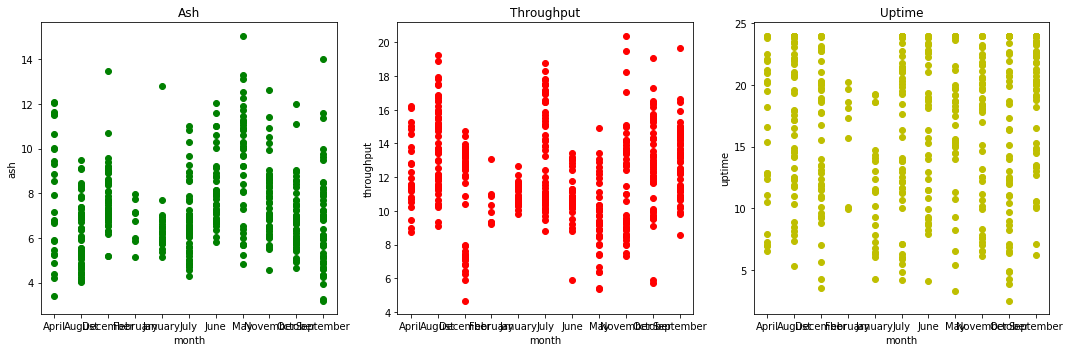

In [10]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,5))

# Now use the axes object to add stuff to plot
axes[0].plot(month, ash, 'go')
axes[0].set_xlabel('month')
axes[0].set_ylabel('ash')
axes[0].set_title('Ash')

axes[1].plot(month, throughput, 'ro')
axes[1].set_xlabel('month')
axes[1].set_ylabel('throughput')
axes[1].set_title('Throughput')

axes[2].plot(month, uptime, 'yo')
axes[2].set_xlabel('month')
axes[2].set_ylabel('uptime')
axes[2].set_title('Uptime')


fig.tight_layout() 



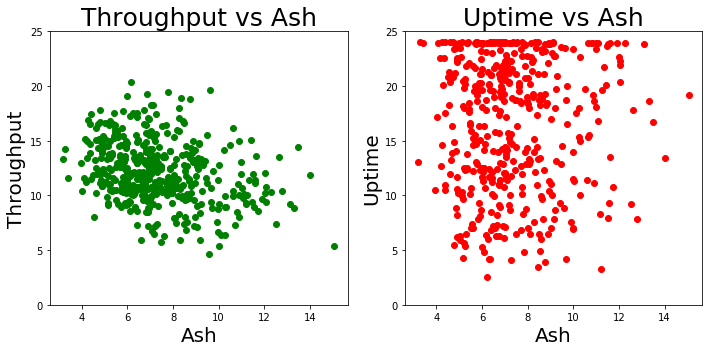

In [11]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

# Now use the axes object to add stuff to plot
axes[0].plot(ash, throughput, 'go')
axes[0].set_xlabel('Ash', size=20)
axes[0].set_ylabel('Throughput', size=20)
axes[0].set_title('Throughput vs Ash', size=25)
axes[0].set_ylim(0,25)

axes[1].plot(ash, uptime, 'ro')
axes[1].set_xlabel('Ash',size=20)
axes[1].set_ylabel('Uptime', size=20)
axes[1].set_title('Uptime vs Ash', size=25)
axes[1].set_ylim(0,25)


fig.tight_layout() 


In [12]:
import seaborn as sns
%matplotlib inline

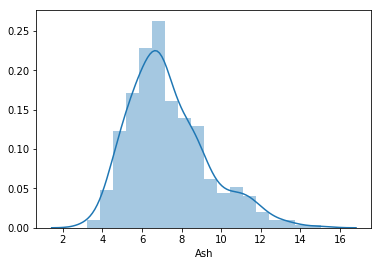

In [13]:

sns.distplot(ash)

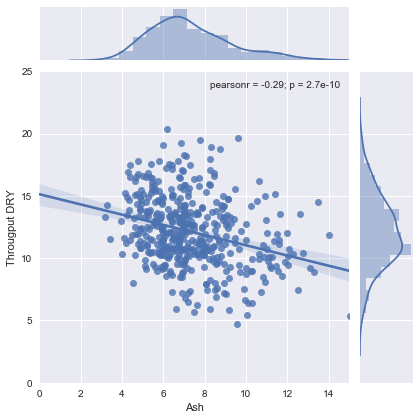

In [14]:
sns.set(style='darkgrid')

sns.jointplot(x=ash,y=throughput,data=data_clean,kind='reg',xlim=(0,15),ylim=(0,25))
plt.savefig('reg.anal_throughput_ash.jpg')



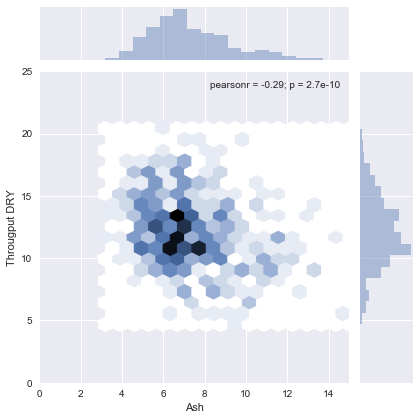

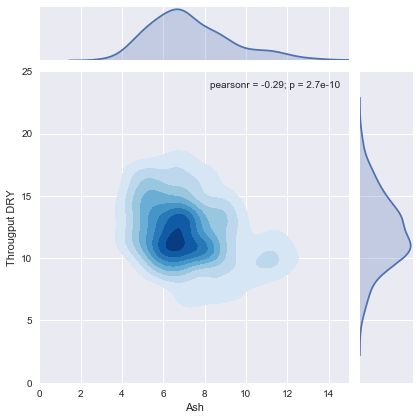

In [15]:
sns.jointplot(x=ash,y=throughput,data=data_clean,kind='hex',xlim=(0,15),ylim=(0,25))
sns.jointplot(x=ash,y=throughput,data=data_clean,kind='kde',xlim=(0,15),ylim=(0,25)
              ,cmap="Blues", shade=True, shade_lowest=False)

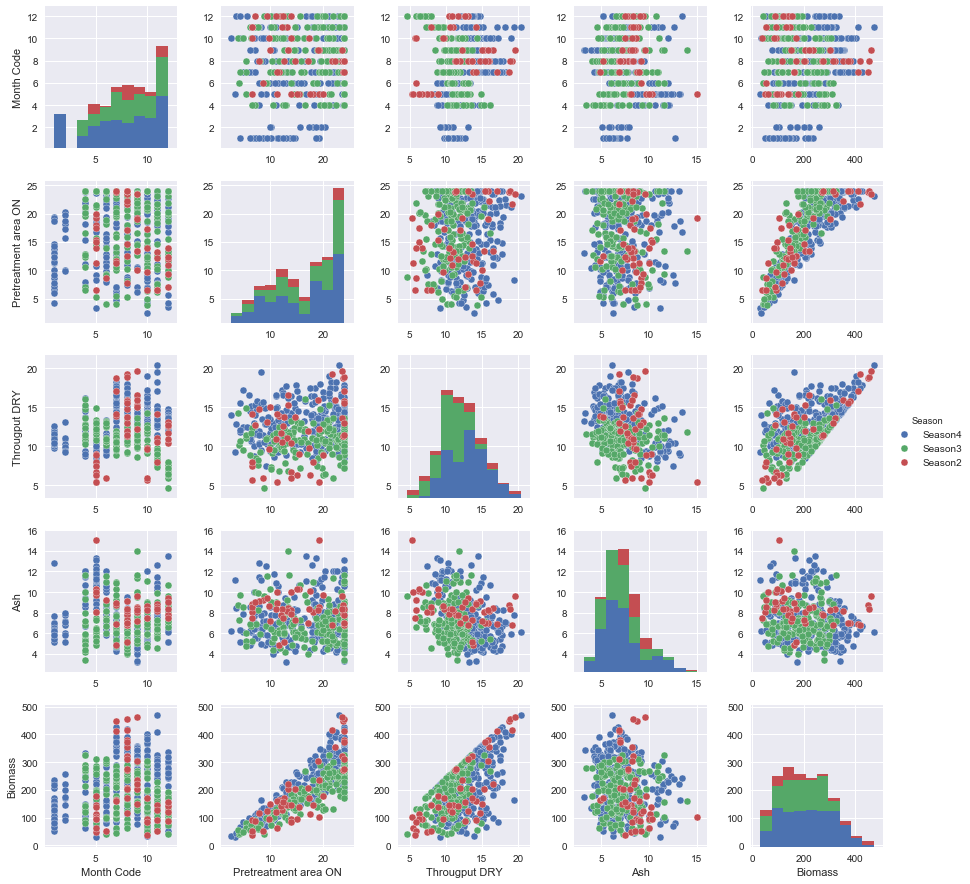

In [16]:
sns.pairplot(data_clean,hue="Season")

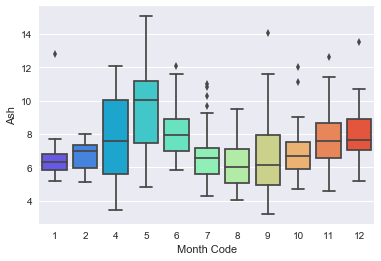

In [17]:
sns.boxplot(x="Month Code", y="Ash", data=data_clean,palette='rainbow')
sns.set_style("darkgrid")
plt.savefig('boxplot_ash.jpg')

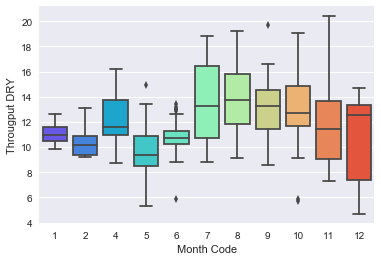

In [18]:
sns.boxplot(x="Month Code", y="Througput DRY", data=data_clean,palette='rainbow')
plt.savefig('boxplot_throughput.jpg')

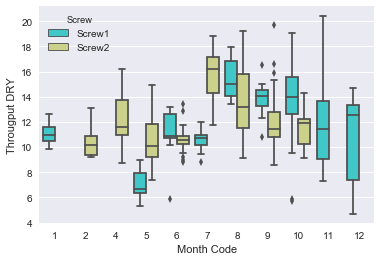

In [19]:
sns.boxplot(x="Month Code", y="Througput DRY", data=data_clean,palette='rainbow',hue="Screw", width=0.8)
plt.savefig('boxplot_screws.jpg')

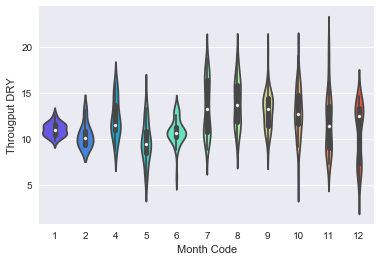

In [20]:
sns.violinplot(x="Month Code", y="Througput DRY", data=data_clean,palette='rainbow')

In [21]:
data_clean.pivot_table(values='Througput DRY',index='Month Code',columns='Season')

Season,Season2,Season3,Season4
Month Code,,,
1,NaN,NaN,11.054713
2,NaN,NaN,10.395365
4,NaN,12.417168,12.025101
5,7.044553,12.460295,9.307204
6,5.879863,11.610020,10.608029
7,15.975891,10.586827,15.762682
8,14.539731,11.388379,15.814068
9,15.786954,11.186123,13.873518
10,7.753885,11.305920,14.651760


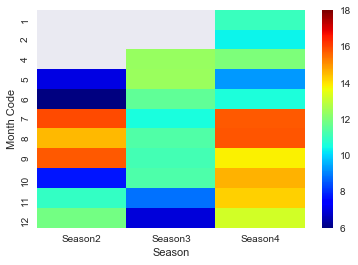

In [22]:
pt_throughput=data_clean.pivot_table(values='Througput DRY',index='Month Code',columns='Season')
sns.heatmap(pt_throughput, cmap='jet',vmin=6,vmax=18)

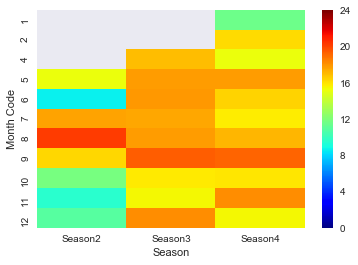

In [23]:
pt_throughput=data_clean.pivot_table(values='Pretreatment area ON',index='Month Code',columns='Season')
sns.heatmap(pt_throughput, cmap='jet',vmin=0,vmax=24)

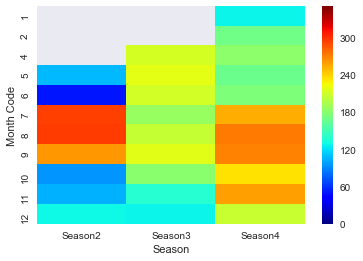

In [24]:
pt_throughput=data_clean.pivot_table(values='Biomass',index='Month Code',columns='Season')
sns.heatmap(pt_throughput, cmap='jet',vmin=0,vmax=350)
sns.set_style("white")
plt.savefig('heatmap_biomass.jpg')

{'boxes': [<matplotlib.lines.Line2D at 0x1e977ae25c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e977ad01d0>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1e977ad0b00>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1e977ae2780>,
  <matplotlib.lines.Line2D at 0x1e977ac5518>]}

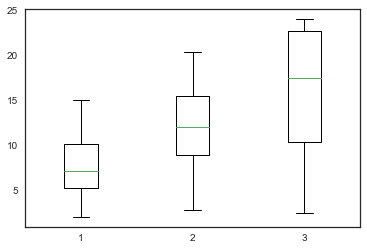

In [25]:
ash_box=ash.describe()
throughput_box=throughput.describe()
uptime_box=uptime.describe()

data_to_plot = [ash_box,throughput_box,uptime_box]


plt.boxplot(data_to_plot,showfliers=False) 




In [26]:
Ash_1=data[data['Month']==1]['Ash'].describe()
Ash_2=data[data['Month']==2]['Ash'].describe()
Ash_3=data[data['Month']==3]['Ash'].describe()
Ash_4=data[data['Month']==4]['Ash'].describe()
Ash_5=data[data['Month']==5]['Ash'].describe()
Ash_6=data[data['Month']==6]['Ash'].describe()
Ash_7=data[data['Month']==7]['Ash'].describe()
Ash_8=data[data['Month']==8]['Ash'].describe()
Ash_9=data[data['Month']==9]['Ash'].describe()
Ash_10=data[data['Month']==10]['Ash'].describe()
Ash_11=data[data['Month']==11]['Ash'].describe()
Ash_12=data[data['Month']==12]['Ash'].describe()


In [27]:
T_1=data[data['Month']==1]['Througput DRY'].describe()
T_2=data[data['Month']==2]['Througput DRY'].describe()
T_3=data[data['Month']==3]['Througput DRY'].describe()
T_4=data[data['Month']==4]['Througput DRY'].describe()
T_5=data[data['Month']==5]['Througput DRY'].describe()
T_6=data[data['Month']==6]['Througput DRY'].describe()
T_7=data[data['Month']==7]['Througput DRY'].describe()
T_8=data[data['Month']==8]['Througput DRY'].describe()
T_9=data[data['Month']==9]['Througput DRY'].describe()
T_10=data[data['Month']==10]['Througput DRY'].describe()
T_11=data[data['Month']==11]['Througput DRY'].describe()
T_12=data[data['Month']==12]['Througput DRY'].describe()

In [28]:
data_to_plot_ash=[Ash_1,Ash_2,Ash_3,Ash_4,Ash_5,Ash_6,Ash_7,Ash_8,Ash_9,Ash_10,Ash_11,Ash_12]
data_to_plot_T=[T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,T_10,T_11,T_12]

C:\Users\Torbjorn\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\Torbjorn\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1857: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\Torbjorn\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1864: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\Torbjorn\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\Torbjorn\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1873: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


{'boxes': [<matplotlib.lines.Line2D at 0x1e977c3bac8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e977d476a0>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1e977d47fd0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1e977c3bd68>,
  <matplotlib.lines.Line2D at 0x1e977ddb5f8>]}

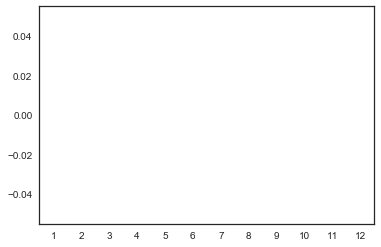

In [29]:
plt.boxplot(data_to_plot_ash,showfliers=False) 

C:\Users\Torbjorn\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\Torbjorn\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1857: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\Torbjorn\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1864: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\Torbjorn\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\Torbjorn\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1873: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


{'boxes': [<matplotlib.lines.Line2D at 0x1e977e55f28>,
 'caps': [<matplotlib.lines.Line2D at 0x1e977e63a58>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1e977e6b3c8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1e977e630b8>,
  <matplotlib.lines.Line2D at 0x1e977ef9978>]}

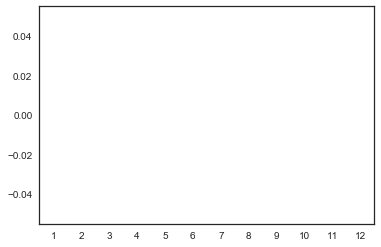

In [30]:
plt.boxplot(data_to_plot_T,showfliers=False) 

In [31]:
data["MM_Ash"]=data[data['Month']==1]['Ash'].mean()

In [32]:
data

,Date,Month Code,Month,Pretreatment area ON,Througput DRY,Ash,Screw,ScrewVersion,Season,MM_Ash
0,2018-01-01,1,January,19.300000,11.606055,6.820000,Screw1,1_v5,Season4,NaN
1,2018-01-02,1,January,14.033333,12.144711,6.490000,Screw1,1_v5,Season4,NaN
2,2018-01-03,1,January,18.650000,12.639730,6.953333,Screw1,1_v5,Season4,NaN
3,2018-01-04,1,January,6.316667,11.325899,6.630000,Screw1,1_v5,Season4,NaN
4,2018-01-05,1,January,11.300000,10.662815,6.040000,Screw1,1_v5,Season4,NaN
5,2018-01-06,1,January,19.183333,10.755012,5.770000,Screw1,1_v5,Season4,NaN
6,2018-01-07,1,January,18.650000,11.675273,5.790000,Screw1,1_v5,Season4,NaN
7,2018-01-08,1,January,14.683333,10.451121,5.726667,Screw1,1_v5,Season4,NaN
8,2018-01-09,1,January,13.800000,11.570837,5.360000,Screw1,1_v5,Season4,NaN
9,2018-01-10,1,January,1.116667,NaN,NaN,Screw1,1_v5,Season4,NaN
